In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/csv_result-dataset_linux_driver_net_first.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e ARB

In [ ]:
data.head()

,id,AltAvgLineBlank,AltAvgLineCode,AltAvgLineComment,AltCountLineBlank,AltCountLineCode,AltCountLineComment,AvgCyclomatic,AvgCyclomaticModified,AvgCyclomaticStrict,AvgEssential,AvgLine,AvgLineBlank,AvgLineCode,AvgLineComment,CountClassBase,CountClassCoupled,CountClassDerived,CountDeclClass,CountDeclClassMethod,CountDeclClassVariable,CountDeclFunction,CountDeclInstanceMethod,CountDeclInstanceVariable,CountDeclInstanceVariablePrivate,CountDeclInstanceVariableProtected,CountDeclInstanceVariablePublic,CountDeclMethod,CountDeclMethodAll,CountDeclMethodConst,CountDeclMethodFriend,CountDeclMethodPrivate,CountDeclMethodProtected,CountDeclMethodPublic,CountInput,CountLine,CountLineBlank,CountLineCode,CountLineCodeDecl,CountLineCodeExe,...,CountPath,CountSemicolon,CountStmt,CountStmtDecl,CountStmtEmpty,CountStmtExe,Cyclomatic,CyclomaticModified,CyclomaticStrict,Essential,Knots,MaxCyclomatic,MaxCyclomaticModified,MaxCyclomaticStrict,MaxEssentialKnots,MaxInheritanceTree,MaxNesting,MinEssentialKnots,PercentLackOfCohesion,RatioCommentToCode,SumCyclomatic,SumCyclomaticModified,SumCyclomaticStrict,SumEssential,n1,n2,N1,N2,Len,Voc,Vol,Dif,Eff,AllocOps,DeallocOps,DerefUse,UniqueDerefUse,DerefSet,UniqueDerefSet,AgingRelatedBugs
0,1,6.00,27.82,9.42,129.89,445.95,377.26,5.00,5.00,5.50,2.00,41.47,6.00,27.71,9.42,0,0,0,0,0,0,12.66,0,0,0,0,0,0,0,0,0,0,0,0,0,923.53,122.66,400.11,82.82,278.50,...,0,238.89,327.26,105.32,0.00,221.95,0,0,0,0,0,21.76,21.76,23.76,0,0,0,0,0,0.90,62.82,62.82,70.82,27.05,211.45,418.18,1033.13,821.97,1855.11,629.63,11479.39,186.29,289423.61,0.07,0.07,73.95,19.07,25.75,9.60,0
1,2,0.00,0.00,0.00,17.00,59.24,35.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,92.24,17.00,20.24,18.24,1.00,...,0,18.24,18.24,18.24,0.00,0.00,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,1.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,3,4.79,35.61,7.58,90.05,529.74,152.68,6.58,6.58,7.00,3.71,46.16,4.79,33.11,7.58,0,0,0,0,0,0,11.42,0,0,0,0,0,0,0,0,0,0,0,0,0,743.53,84.42,415.74,124.32,279.13,...,0,248.08,317.32,72.58,9.00,235.74,0,0,0,0,0,19.71,19.71,23.71,0,0,0,0,0,0.34,73.68,73.68,79.47,46.50,260.71,423.58,1319.18,968.08,2287.26,684.29,14708.61,279.63,594338.34,0.00,0.07,102.85,18.32,16.27,6.05,0
3,4,0.00,0.00,0.00,16.00,44.00,68.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,91.00,16.00,0.00,0.00,0.00,...,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,5,4.00,28.66,6.00,225.50,1038.03,441.71,6.74,6.00,7.74,2.74,38.18,4.00,28.66,6.00,0,0,0,0,0,0,31.61,0,0,0,0,0,0,0,0,0,0,0,0,0,1684.68,219.58,937.45,130.08,703.53,...,0,558.95,770.32,130.95,13.71,625.66,0,0,0,0,0,40.00,31.00,42.00,0,0,0,0,0,0.47,207.03,193.03,234.74,96.05,598.82,1026.16,3296.39,2567.84,5864.24,1624.97,37936.53,638.55,1667451.55,0.07,1.07,337.50,53.25,117.70,23.95,0


In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [ ]:

featureScores

,Features,Score
0,id,28.846153
1,AltAvgLineBlank,20.139487
2,AltAvgLineCode,45.380947
3,AltAvgLineComment,7.011101
4,AltCountLineBlank,26118.951941
5,AltCountLineCode,85001.051179
6,AltCountLineComment,9848.441818
7,AvgCyclomatic,4.524788
8,AvgCyclomaticModified,3.883042
9,AvgCyclomaticStrict,1.482852


In [ ]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Features         Score
5      AltCountLineCode  85001.051179
4     AltCountLineBlank  26118.951941
6   AltCountLineComment   9848.441818
11              AvgLine     69.698914
2        AltAvgLineCode     45.380947
13          AvgLineCode     44.474557
0                    id     28.846153
12         AvgLineBlank     20.515508
1       AltAvgLineBlank     20.139487
14       AvgLineComment      7.599698


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[0.06411748 0.05295264 0.07862793 0.05025425 0.12860799 0.09952355
 0.07139647 0.05462371 0.05278531 0.04979004 0.0538081  0.06910622
 0.05511098 0.07578228 0.04351305 0.         0.         0.
 0.         0.        ]


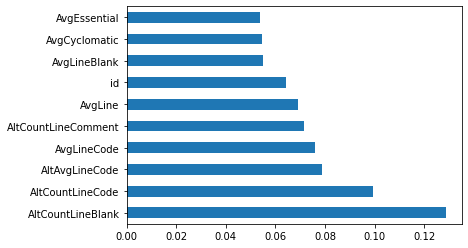

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()